<h1><font size=12>
Weather Derivatites </h1>
<h1> Historical Precipitation Comparison <br></h1>

Developed by [Jesus Solano](mailto:ja.solano588@uniandes.edu.co) <br>  
05 November 2018 


In [86]:
# Import needed libraries. 
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
import time
from io import StringIO
import datetime 
import pickle
from scipy import stats

# Import Datasets

In [2]:
# Import total dataset. 
# Configure path to read txts.

path = '../datasets/'

# Download the update dataset.

import os

if not os.path.exists(path+'/fullDataset/completeDailyDataset.pickle'):

  ! wget https://github.com/jesugome/WeatherDerivates/raw/master/datasets/fullDataset/completeDailyDataset.pickle -P path 

allDataDataframe = pickle.load(open(path+'/fullDataset/completeDailyDataset.pickle','rb'))

In [20]:
allDataDataframe.head(30)

,Prep,Month,nino34,probNeutral,probNino,probNina,state,nextState
2005-01-01,0,1,0.606186,0.15,0.85,0,0,0
2005-01-02,0,1,0.599358,0.15,0.85,0,0,0
2005-01-03,0,1,0.646784,0.15,0.85,0,0,1
2005-01-04,1.6,1,0.663696,0.15,0.85,0,1,0
2005-01-05,0,1,0.71133,0.15,0.85,0,0,0
2005-01-06,0,1,0.679185,0.15,0.85,0,0,0
2005-01-07,0,1,0.558135,0.15,0.85,0,0,0
2005-01-08,0,1,0.451021,0.15,0.85,0,0,0
2005-01-09,0,1,0.593434,0.15,0.85,0,0,1
2005-01-10,0.4,1,0.672419,0.15,0.85,0,1,0


In [166]:
# Download Data

# Configure path to read txts.

path = '../datasets/'

# Download the update dataset.

import os

if not os.path.exists(path+'precipitationAllTime.csv'):

  ! wget https://github.com/jesugome/WeatherDerivates/raw/master/datasets/precipitationAllTime.csv -P path

  ! wget https://github.com/jesugome/WeatherDerivates/raw/master/datasets/precipitationRemovingAverageAllTime.csv -P path


precipitationAllTime = pd.read_csv(path+'precipitationAllTime.csv',header=None, names = ['Date','Prep'])

precipitationAllTime['Date'] = pd.to_datetime(precipitationAllTime['Date'])
precipitationAllTime = precipitationAllTime.set_index('Date')

precipitationAllTime.head(10)

,Prep
Date,
1972-01-01,0.0
1972-01-02,0.7
1972-01-03,0.0
1972-01-04,0.0
1972-01-05,0.0
1972-01-06,0.0
1972-01-07,0.0
1972-01-08,0.2
1972-01-09,2.2


# Historical Histograms

In [167]:
# Creates a function to plot a month historical accumulated rainfall over years.

def monthAccumulatedHistogram(month,allDataDataframe,bins,color):
    
    # Defines dates for specify month.

    monthDataRange = pd.date_range(start = '1972-'+str(format(month,'02'))+'-01', end = '2015-'+str(format(month,'02'))+'-01', freq = pd.DateOffset(years=1))

    # Historical month Rainfall per year.
    monthTotalRainfall=[]

    for date in monthDataRange:
        tempDate=pd.date_range(date,end=date+1,freq='MS')
        tempDateRange= pd.date_range(start=date,end=tempDate[0]+1,freq='D')

        # Define accumulated rainfall.
        rainfallSum = 0
        for day in tempDateRange[:-1]:

            #print(allDataDataframe.loc[date.strftime('%Y-%m-%d'),'Prep'])
            rainfallSum+= allDataDataframe.loc[day.strftime('%Y-%m-%d'),'Prep']

        monthTotalRainfall.append(rainfallSum)
        
    fig = plt.figure(figsize=(20, 10))

    plt.hist(monthTotalRainfall,facecolor=color,bins=bins, density=True,
             histtype='stepfilled', edgecolor = 'black' , hatch = '+')

    plt.title('Rainfall Simulation -->  Month '+str(month))
    plt.xlabel('Rainfall Accumulated Amount [mm]')
    plt.ylabel('Probability ')
    plt.grid()
    plt.show()
    
    ## Print Statistics.

    print(stats.describe(monthTotalRainfall),'\n\n')

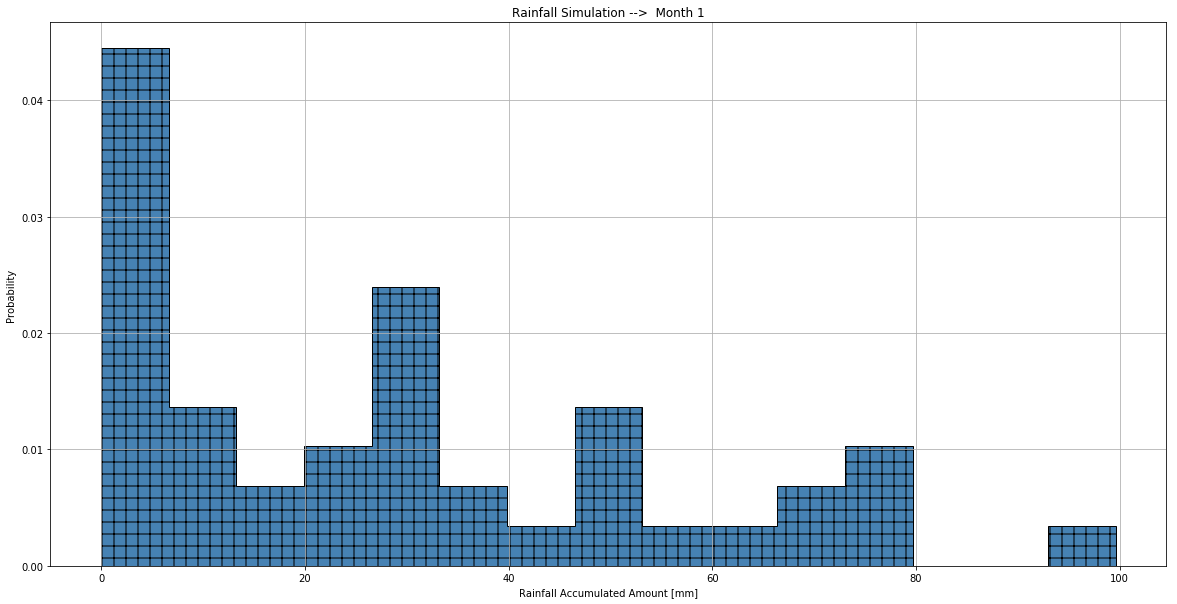

DescribeResult(nobs=44, minmax=(0.0, 99.6), mean=29.443181818181817, variance=700.718789640592, skewness=0.8274084191166678, kurtosis=-0.2940360533546129) 




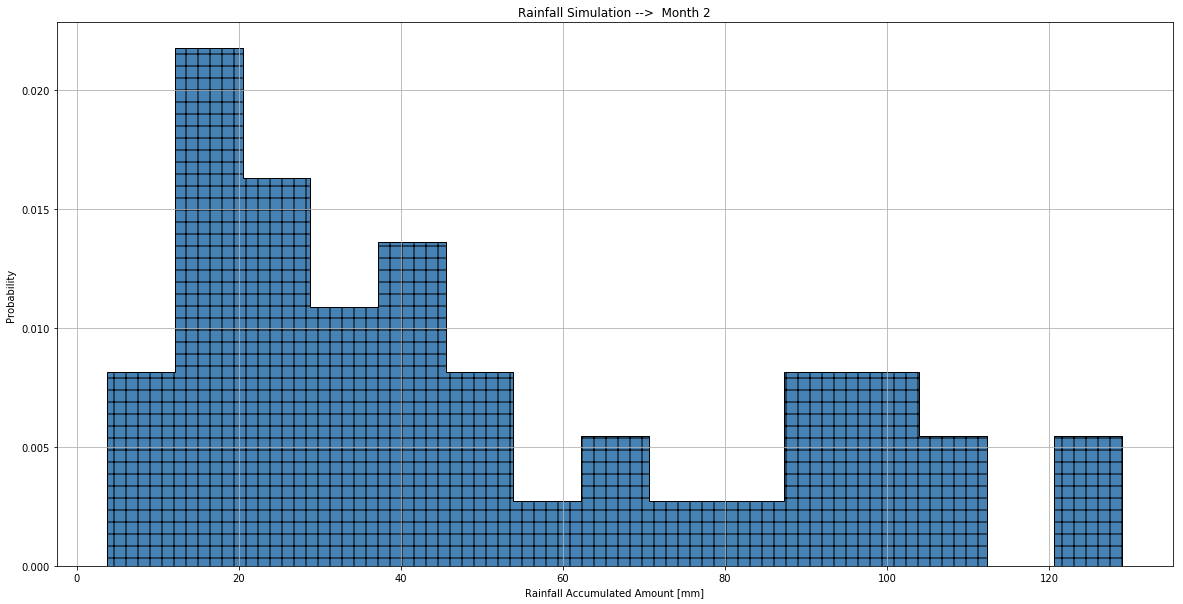

DescribeResult(nobs=44, minmax=(3.8000000000000003, 129.0), mean=49.93636363636363, variance=1249.7819027484145, skewness=0.7161725514148924, kurtosis=-0.7239758857046246) 




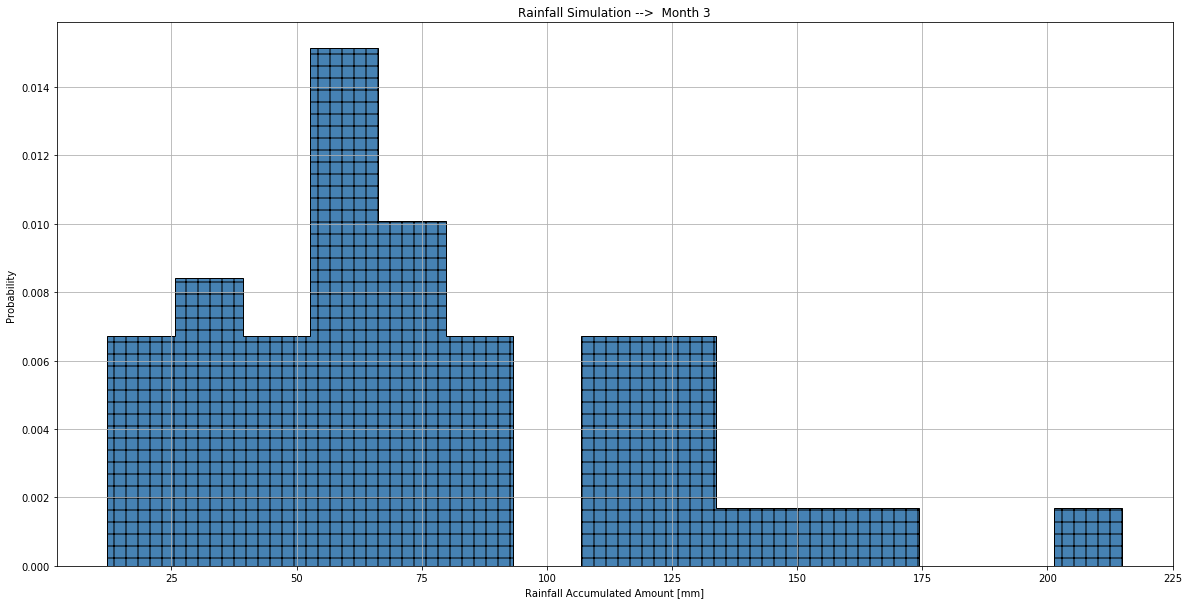

DescribeResult(nobs=44, minmax=(12.2, 214.90000000000003), mean=76.22500000000001, variance=1944.466104651163, skewness=0.903748861665306, kurtosis=0.6978335256097572) 




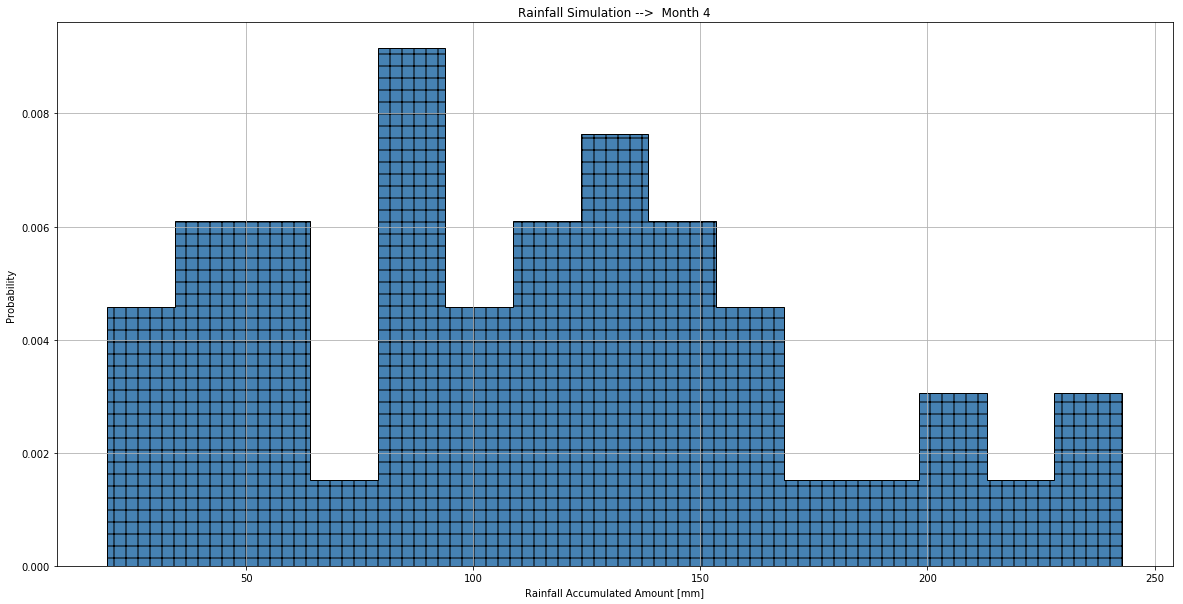

DescribeResult(nobs=44, minmax=(19.4, 242.8), mean=113.5431818181818, variance=3283.1127431289647, skewness=0.3914521776978979, kurtosis=-0.5463404776991769) 




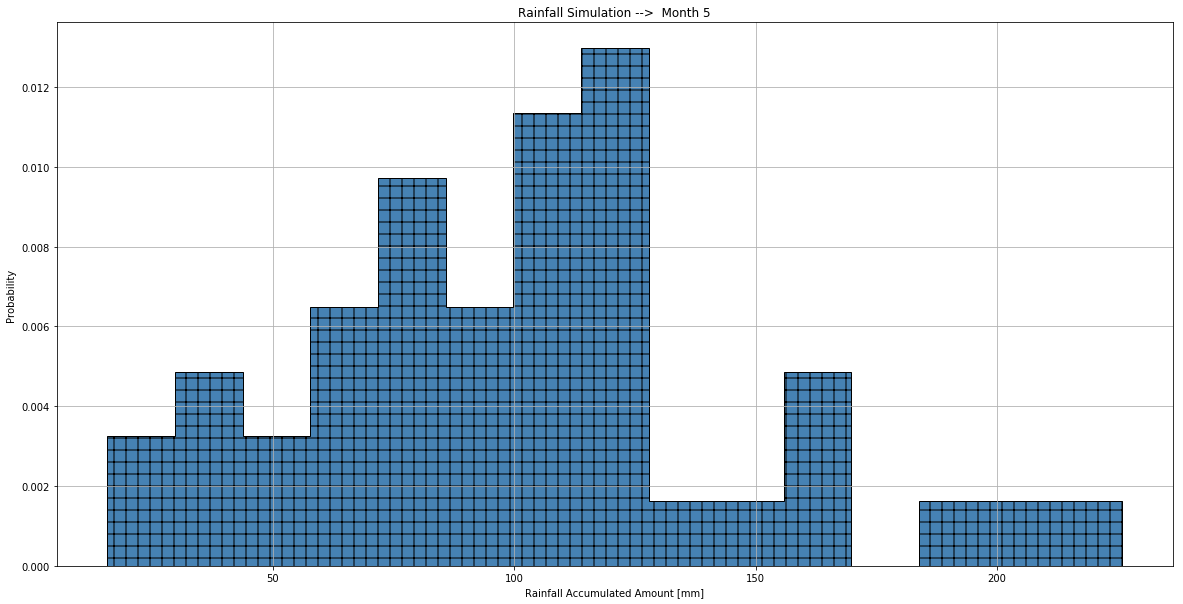

DescribeResult(nobs=44, minmax=(15.700000000000001, 225.9), mean=100.61136363636363, variance=2191.880100422832, skewness=0.498019311106236, kurtosis=0.22947952877541145) 




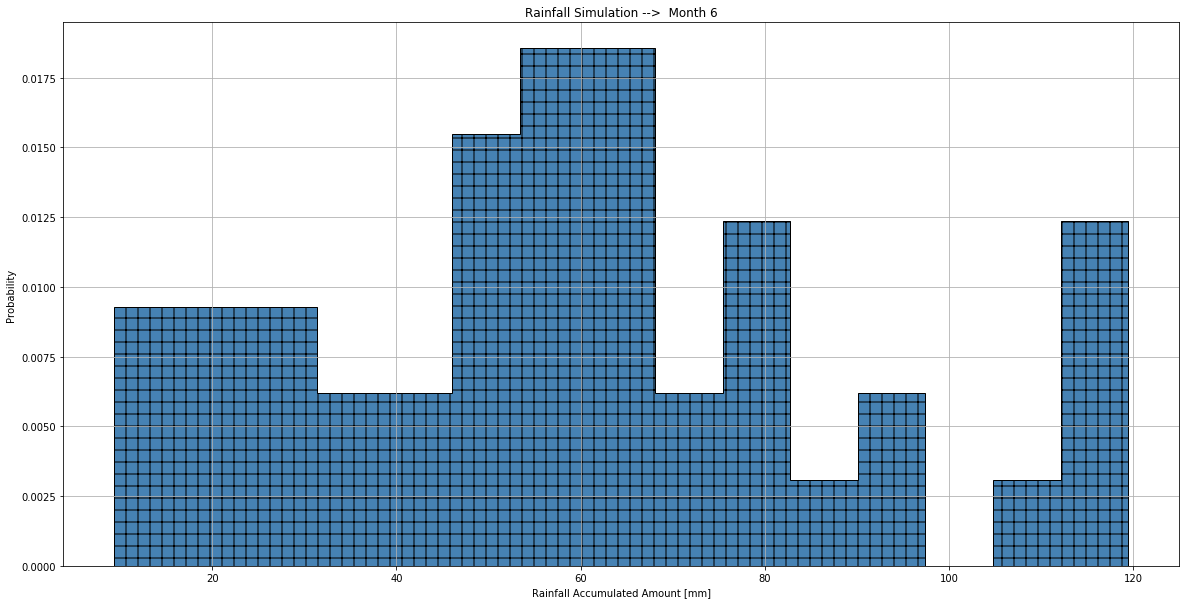

DescribeResult(nobs=44, minmax=(9.3, 119.5), mean=59.70681818181818, variance=866.8080919661734, skewness=0.33620619531158524, kurtosis=-0.5693386419476316) 




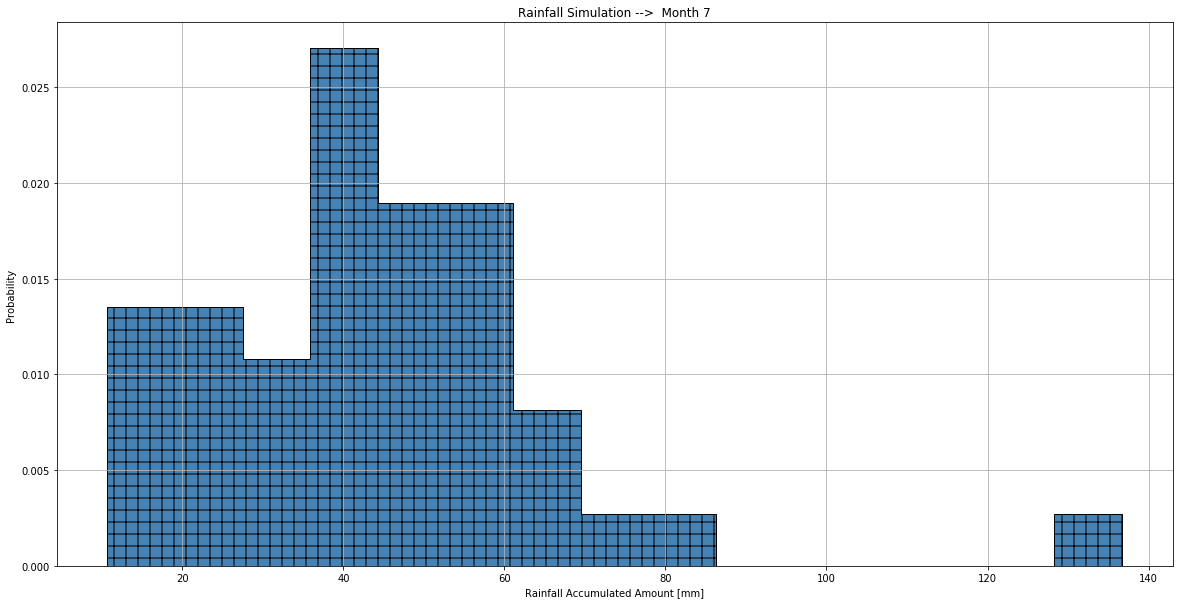

DescribeResult(nobs=44, minmax=(10.700000000000001, 136.7), mean=43.28181818181818, variance=490.31826638477787, skewness=1.6801779788071727, kurtosis=5.408033424505785) 




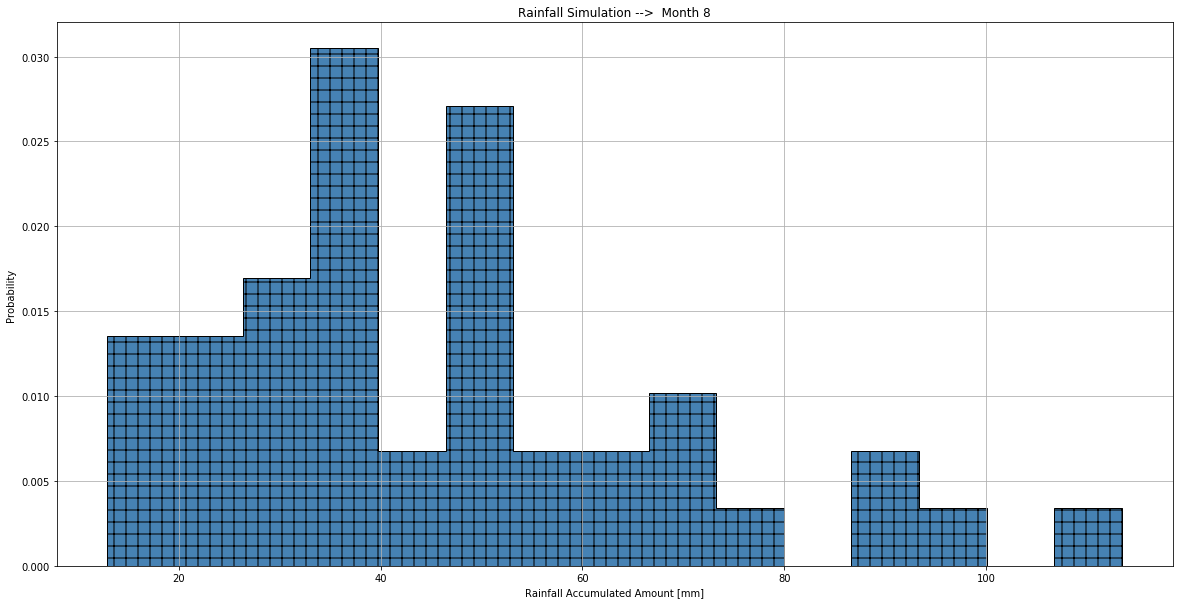

DescribeResult(nobs=44, minmax=(12.9, 113.49999999999999), mean=46.090909090909086, variance=525.1961945031712, skewness=0.8995793629855985, kurtosis=0.5208258294959682) 




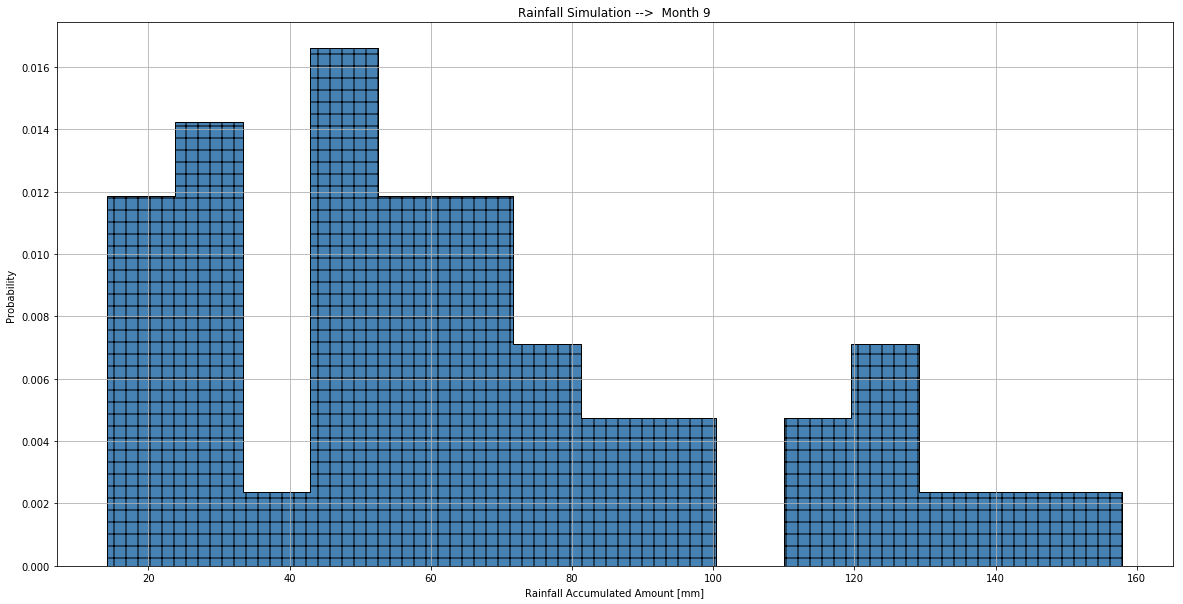

DescribeResult(nobs=44, minmax=(14.2, 157.89999999999998), mean=64.9409090909091, variance=1386.623868921776, skewness=0.7012420565068008, kurtosis=-0.3445959158723171) 




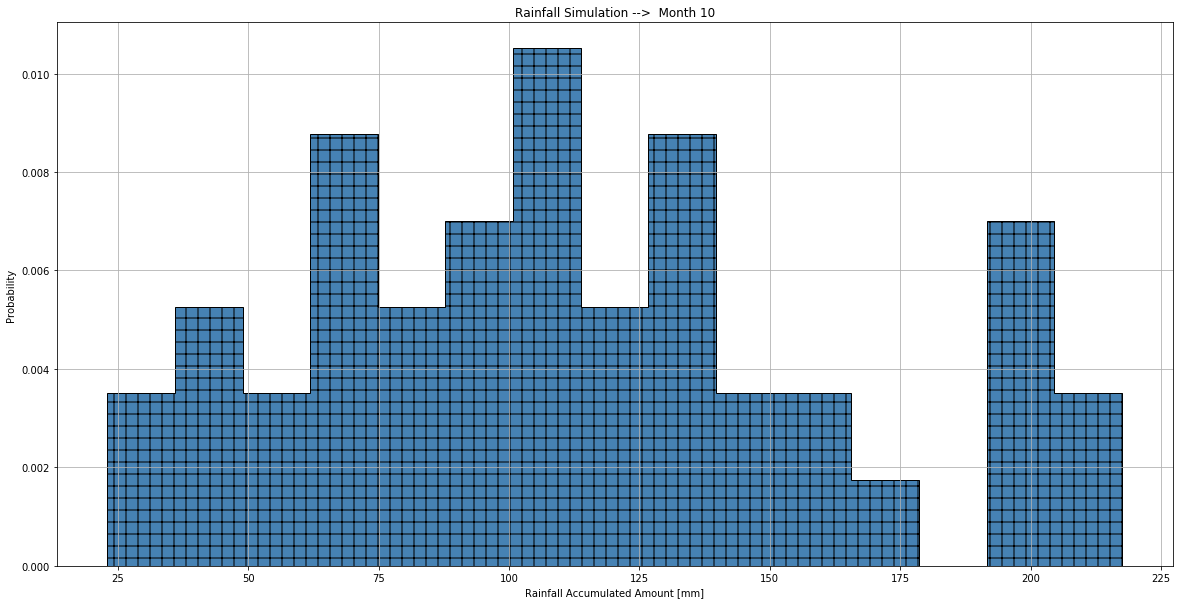

DescribeResult(nobs=44, minmax=(22.999999999999993, 217.50000000000003), mean=112.00227272727271, variance=2619.7695295983094, skewness=0.4218817294338596, kurtosis=-0.5876130641985533) 




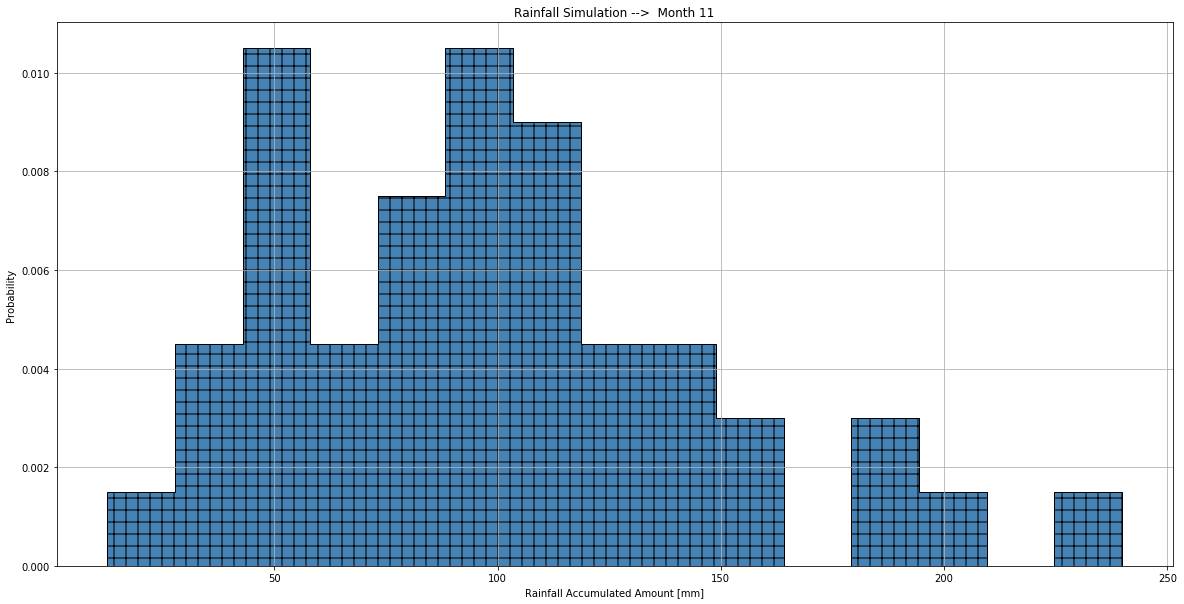

DescribeResult(nobs=44, minmax=(12.6, 239.8), mean=98.42727272727275, variance=2329.687145877379, skewness=0.7079216033574666, kurtosis=0.4471201262061024) 




In [168]:
for i in range(1,12):
    monthAccumulatedHistogram(month = i,allDataDataframe=precipitationAllTime, bins=15 ,color='steelblue' )

# Simulated Data

### Download Data

In [128]:
### Load transitions and amount parameters.

# Transitions probabilites.
transitionsParametersDry = pd.read_csv('../results/visibleMarkov/transitionsParametersDry.csv', sep = ' ', header=None, names = ['variable', 'value'])
transitionsParametersDry.index += 1 
transitionsParametersDry

transitionsParametersWet = pd.read_csv('../results/visibleMarkov/transitionsParametersWet.csv', sep = ' ', header=None, names = ['variable', 'value'])
transitionsParametersWet.index += 1 
transitionsParametersWet

amountParametersGamma = pd.read_csv('../results/visibleMarkov/amountGammaPro.csv', sep = ' ', header=None, names = ['variable', 'mu', 'shape'])
amountParametersGamma.index += 1 

### ENSO probabilistic forecast.

# Open saved data.
ensoForecast = pickle.load(open('../datasets/ensoForecastProb/ensoForecastProbabilities.pickle','rb'))

### Simulation Core

In [129]:
# Import needed libraries. 
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import gamma
import pickle
import time
import datetime
from scipy import stats

In [169]:

### Build the simulation core.

# Updates the state of the day based on yesterday state. 
def updateState(yesterdayIndex, simulationDataFrame, transitionsParametersDry, transitionsParametersWet):
    
    # Additional data of day.
    yesterdayState = simulationDataFrame['state'][yesterdayIndex]
    yesterdayPrep = simulationDataFrame['Prep'][yesterdayIndex]
    yesterdayProbNino = simulationDataFrame['probNino'][yesterdayIndex]
    yesterdayProbNina = simulationDataFrame['probNina'][yesterdayIndex]
    yesterdayMonth = simulationDataFrame['Month'][yesterdayIndex]
    
    # Calculate transition probability.
    if yesterdayState == 0:
        # Includes month factor + probNino value + probNino value.
        successProbabilityLogit = transitionsParametersDry['value'][1]+transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersDry['value'][13] +  yesterdayProbNina*transitionsParametersDry['value'][14]
              
        if yesterdayMonth==1: 
            # Includes month factor + probNino value + probNino value.
            successProbabilityLogit = transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersDry['value'][13] +  yesterdayProbNina*transitionsParametersDry['value'][14]
            
        successProbability = (np.exp(successProbabilityLogit))/(1+np.exp(successProbabilityLogit)) 
        
    elif yesterdayState == 1:
        # Includes month factor + probNino value + probNino value + prep value .
        successProbabilityLogit = transitionsParametersDry['value'][1]+ transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersWet['value'][14] +  yesterdayProbNina*transitionsParametersWet['value'][15] + yesterdayPrep*transitionsParametersWet['value'][13] 
        
        if yesterdayMonth==1:
            # Includes month factor + probNino value + probNino value + prep value .
            successProbabilityLogit = transitionsParametersDry['value'][yesterdayMonth] + yesterdayProbNino*transitionsParametersWet['value'][14] +  yesterdayProbNina*transitionsParametersWet['value'][15] + yesterdayPrep*transitionsParametersWet['value'][13] 
        
        successProbability = (np.exp(successProbabilityLogit))/(1+np.exp(successProbabilityLogit))    
    else:
        print('State of date: ', simulationDataFrame.index[yesterdayIndex],' not found.')
    
    #print(successProbability)
    #successProbability = monthTransitions['p'+str(yesterdayState)+'1'][yesterdayMonth] 
    
    todayState = bernoulli.rvs(successProbability)
    
    return todayState 



# Simulates one run of simulation. 
def oneRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma):
    
    # Define the total rainfall amount over the simulation.
    rainfall = 0
    
    # Total rainfall days.
    wetDays = 0
    
    # Loop over days in simulation to calculate rainfall ammount.
    for day in range(1,len(simulationDataFrame)):
        
        # Get today date. 
        dateOfDay = datetime.datetime.strptime(simulationDataFrame.index[day],'%Y-%m-%d')
       
    
        # Update today state based on the yesterday state. 
        todayState = updateState(day-1, simulationDataFrame, transitionsParametersDry, transitionsParametersWet)
        
        # Write new day information.
        simulationDataFrame['state'][day] = todayState
        simulationDataFrame['nextState'][day-1] = todayState
        
        # Computes total accumulated rainfall.
        if todayState == 1:
            
            # Sum wet day.
            wetDays+=1
            
            # Additional data of day.
            todayProbNino = simulationDataFrame['probNino'][day]
            todayProbNina = simulationDataFrame['probNina'][day]
            todayMonth = simulationDataFrame['Month'][day]
            
            
            
            # Calculates gamma log(mu).
            gammaLogMu = amountParametersGamma['mu'][1] + amountParametersGamma['mu'][todayMonth]+ todayProbNino*amountParametersGamma['mu'][13]+todayProbNino*amountParametersGamma['mu'][13] 
            #print(gammaMu)
            # Calculates gamma scale
            gammaLogShape = amountParametersGamma['shape'][1] + amountParametersGamma['shape'][todayMonth]+ todayProbNino*amountParametersGamma['shape'][13]+todayProbNino*amountParametersGamma['shape'][13]
            #print(gammaShape)
            
            if todayMonth==1:
                # Calculates gamma log(mu).
                gammaLogMu =  amountParametersGamma['mu'][todayMonth]+ todayProbNino*amountParametersGamma['mu'][13]+todayProbNino*amountParametersGamma['mu'][13] 
                #print(gammaMu)
                # Calculates gamma scale
                gammaLogShape = amountParametersGamma['shape'][todayMonth]+ todayProbNino*amountParametersGamma['shape'][13]+todayProbNino*amountParametersGamma['shape'][13]
                #print(gammaShape)
            
            # Update mu
            gammaMu = np.exp(gammaLogMu)
            
            # Update shape
            gammaShape = np.exp(gammaLogShape)
            
            # Calculate gamma scale.
            gammaScale = gammaMu / gammaShape
            
            # Generate random rainfall.
            todayRainfall = gamma.rvs(a = gammaShape, scale = gammaScale)
            
            '''
            
            # !!!!!! Delete !!!!!!!!!!!!!11. 
            todayRainfall = gamma.rvs(amountParametersGamma['Shape'][0],amountParametersGamma['Loc'][0],amountParametersGamma['Scale'][0]) 
            
            '''
            
            
            # Write new day information.
            simulationDataFrame['Prep'][day] = todayRainfall
            
            # Updates rainfall amount. 
            rainfall += todayRainfall
            
        else:
            # Write new day information.
            simulationDataFrame['Prep'][day] = 0
            
        
        yesterdayState = todayState
            
    
    return rainfall,wetDays

# Run total iterations.
def totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations):
    
    # Initialize time 
    startTime = time.time()
    
    # Array to store all precipitations.
    rainfallPerIteration = [None]*iterations
    
    wetDaysPerIteration = [None]*iterations
    
    # Loop over each iteration(simulation)
    
    for i in range(iterations):
        
        simulationDataFrameC = simulationDataFrame.copy()
        
        iterationRainfall,wetDays = oneRun(simulationDataFrameC, transitionsParametersDry, transitionsParametersWet, amountParametersGamma)
        
        rainfallPerIteration[i] = iterationRainfall
        
        wetDaysPerIteration[i] = wetDays
    
    # Calculate time
    currentTime = time.time() - startTime 
    
    # Print mean of wet days. 
    
    #print('The mean of wet days is: ', np.mean(wetDaysPerIteration))
    
    # Logging time.
    #print('The elapsed time over simulation is: ', currentTime, ' seconds.')
    
    return rainfallPerIteration



def createTotalDataFrame(daysNumber, startDate , initialState , initialPrep , ensoForecast, optionMonthTerm ):
    # Set variables names.
    totalDataframeColumns = ['state','Prep','Month','probNina','probNino', 'nextState']

    # Create dataframe.

    allDataDataframe = pd.DataFrame(columns=totalDataframeColumns) 

    # Number of simulation days(i.e 30, 60)
    daysNumber = daysNumber

    # Simulation start date ('1995-04-22')
    startDate = startDate

    # State of rainfall last day before start date --> Remember 0 means dry and 1 means wet.
    initialState = initialState
    initialPrep = initialPrep   # Only fill when initialState == 1  


    dates = pd.date_range(startDate, periods = daysNumber + 2 , freq='D')

    for date in dates: 

        # Fill precipitation amount.
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'Prep'] = np.nan

        # Fill month of date 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'Month'] = date.month
        
        tempDate = None
        if optionMonthTerm==1:
            tempDate = date 
        else:
            tempDate = date - pd.DateOffset(months=optionMonthTerm-1)
        
        # Fill El Nino ENSO forecast probability. 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'probNino'] = float(ensoForecast[tempDate.strftime('%Y-%m')].loc[optionMonthTerm-1,'El Niño'].strip('%').strip('~'))/100

        # Fill La Nina ENSO forecast probability. 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'probNina'] = float(ensoForecast[tempDate.strftime('%Y-%m')].loc[optionMonthTerm-1,'La Niña'].strip('%').strip('~'))/100

        # Fill State. 
        allDataDataframe.loc[date.strftime('%Y-%m-%d'),'state'] = np.nan


    simulationDataFrame = allDataDataframe[:-1]

    # Fill initial conditions. 
    simulationDataFrame['state'][0] = initialState
    if initialState == 1:
        simulationDataFrame['Prep'][0] = initialPrep
    else:
        simulationDataFrame['Prep'][0] = 0.0
    
    return simulationDataFrame


def plotRainfallDistribution(rainfallSimulated):
  
    # Create Figure.
    fig = plt.figure(figsize=(20, 10))

    # Plot histogram.
    plt.hist(rainfallSimulated,facecolor='lightgreen',bins=15, density=True,
           histtype='stepfilled', edgecolor = 'black' , hatch = '+')

    # Add axis names.
    plt.title('Rainfall Simulation')
    plt.xlabel('Rainfall Amount [mm]')
    plt.ylabel('Probability ')
    plt.grid()
    plt.show()


def optionRainfallCalculator(iterations, startDate, transitionsParametersDry, transitionsParametersWet, amountParametersGamma, optionMonthTerm):
  
    ## Generates initial conditions.
  
    # Defines initial state based on proportions.
    successProbability = 0.5
    initialState = bernoulli.rvs(successProbability) 

    # Calculates initial prepicipitation.
    if initialState == 1:
        initialPrep = 1.0
    else:
        initialPrep = 0.0

    ## Create dataframe to simulate. 
    simulationDataFrame = createTotalDataFrame(daysNumber= 30, startDate = startDate, initialState = initialState , initialPrep =  initialPrep, ensoForecast = ensoForecast, optionMonthTerm = optionMonthTerm)

    ## Run all iterations.
    rainfallPerIteration = totalRun(simulationDataFrame, transitionsParametersDry, transitionsParametersWet, amountParametersGamma,iterations)



    return rainfallPerIteration

### Simulation


 
 Current Month is: 01


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


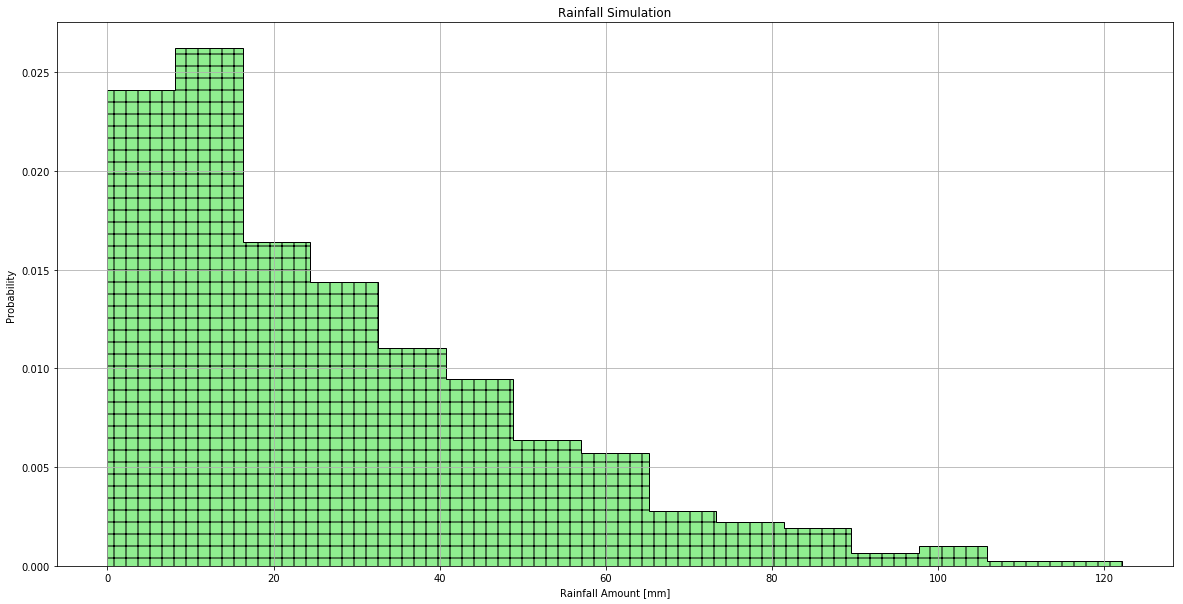

DescribeResult(nobs=1100, minmax=(0.0, 122.15096171044578), mean=27.71791730953835, variance=517.2553409673092, skewness=1.152820478793279, kurtosis=1.0465606163180876)

 
 Current Month is: 02


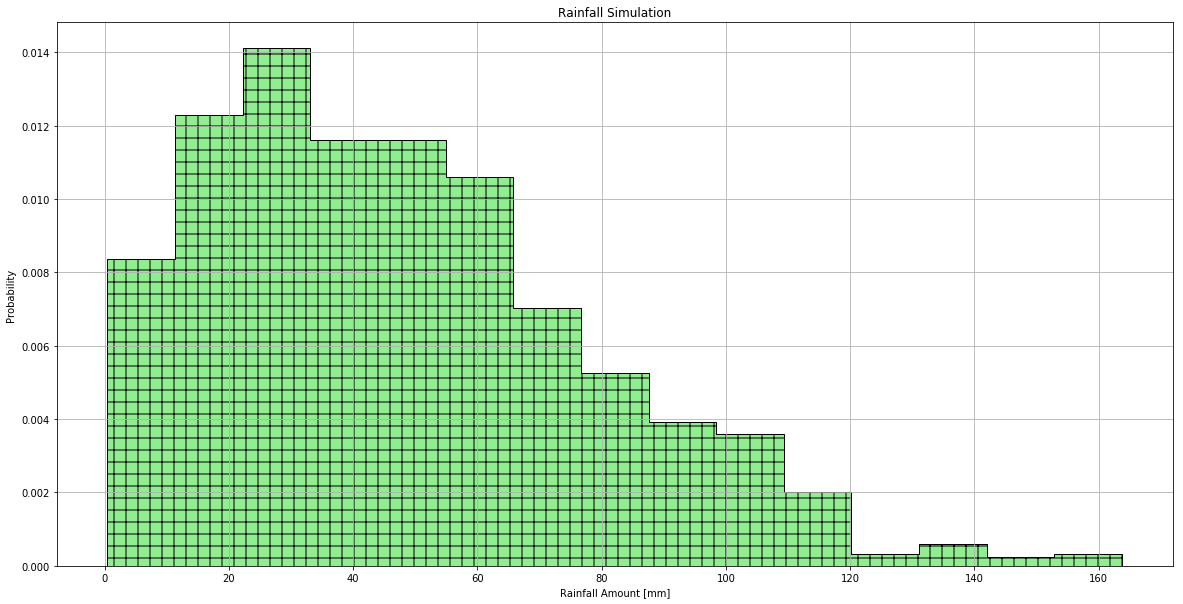

DescribeResult(nobs=1100, minmax=(0.46964637209650895, 163.74724888605476), mean=48.09553116618922, variance=934.6494778448199, skewness=0.7723698069969789, kurtosis=0.27728312616006523)

 
 Current Month is: 03


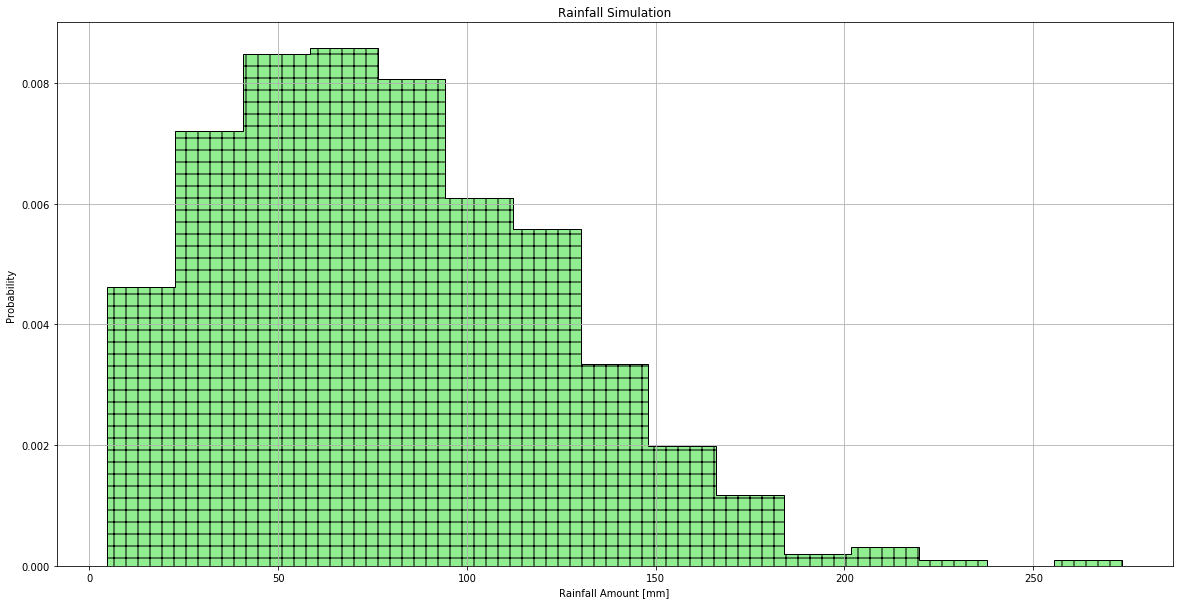

DescribeResult(nobs=1100, minmax=(4.7904044836351884, 273.4580768698538), mean=79.25820097709448, variance=1906.6071200740732, skewness=0.6280107429740703, kurtosis=0.3108945246010224)

 
 Current Month is: 04


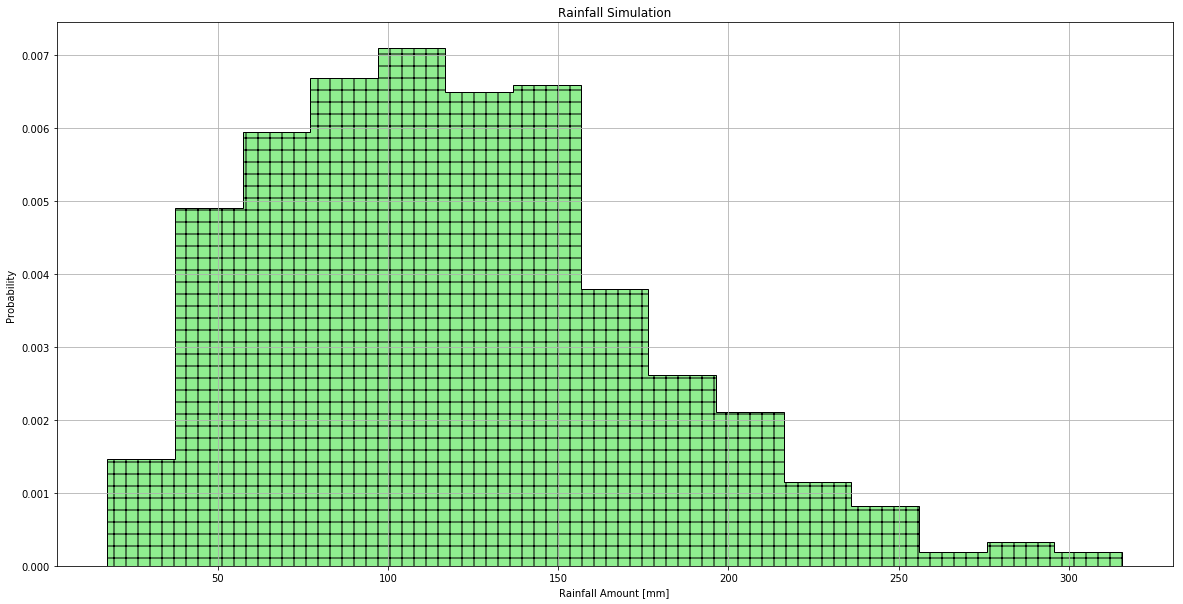

DescribeResult(nobs=1100, minmax=(17.47513825160534, 315.62119084833216), mean=119.50775631970075, variance=2946.18120723101, skewness=0.6187188579013829, kurtosis=0.20282429822370052)

 
 Current Month is: 05


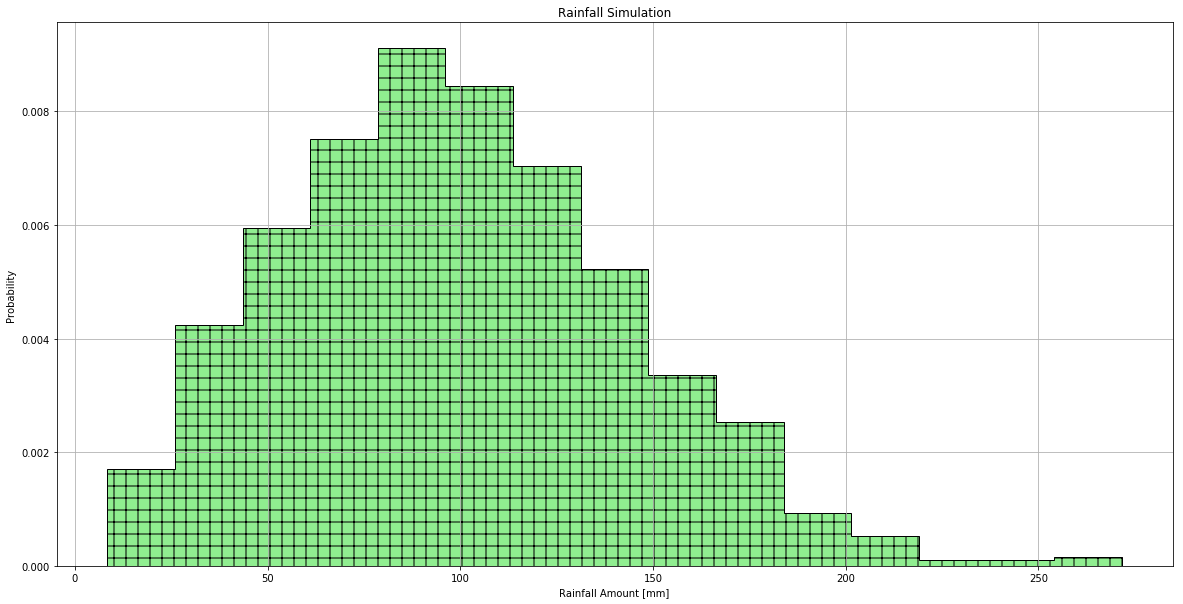

DescribeResult(nobs=1100, minmax=(8.409975530630934, 271.68933648531845), mean=98.9542412377586, variance=1955.8563231479116, skewness=0.4426927630194094, kurtosis=0.10399402625074661)

 
 Current Month is: 06


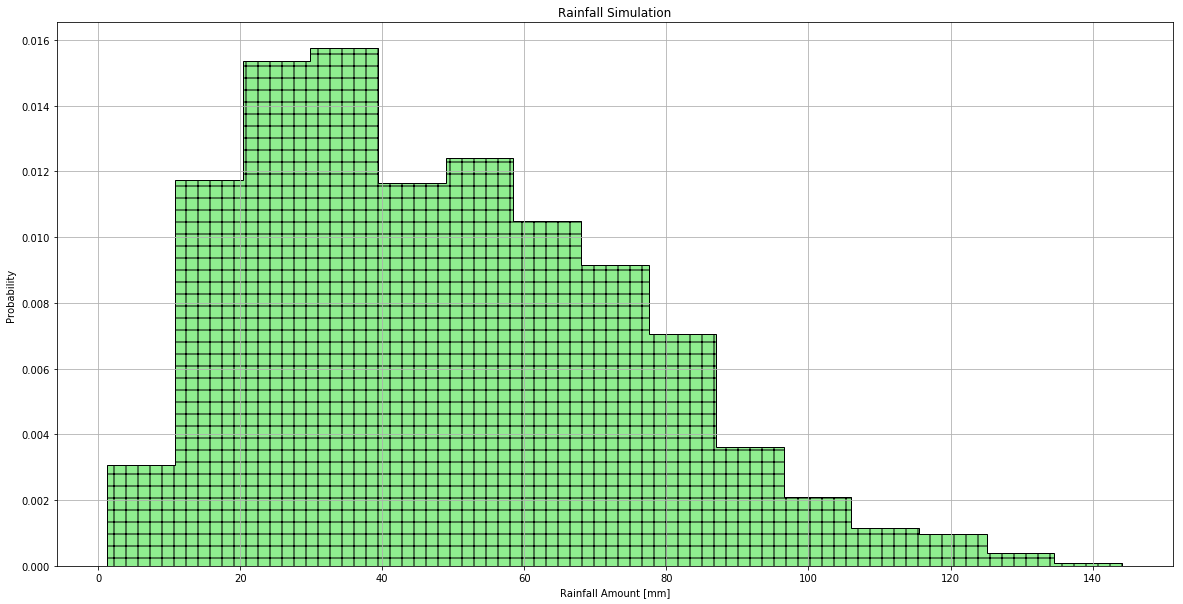

DescribeResult(nobs=1100, minmax=(1.3125733993498816, 144.13573232240788), mean=48.289463881884906, variance=666.0604830145886, skewness=0.5885703073219196, kurtosis=-0.15716544523475662)

 
 Current Month is: 07


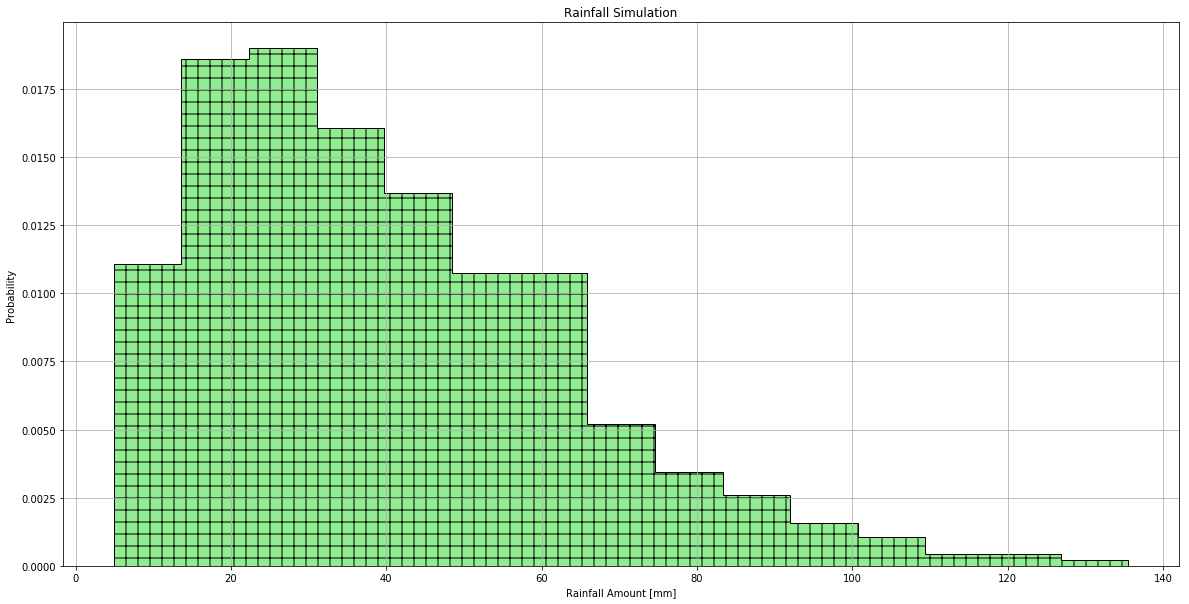

DescribeResult(nobs=1100, minmax=(4.9170570385083785, 135.55702579144236), mean=40.172107156308215, variance=538.134170617968, skewness=0.9036060632629793, kurtosis=0.6603053561924273)

 
 Current Month is: 08


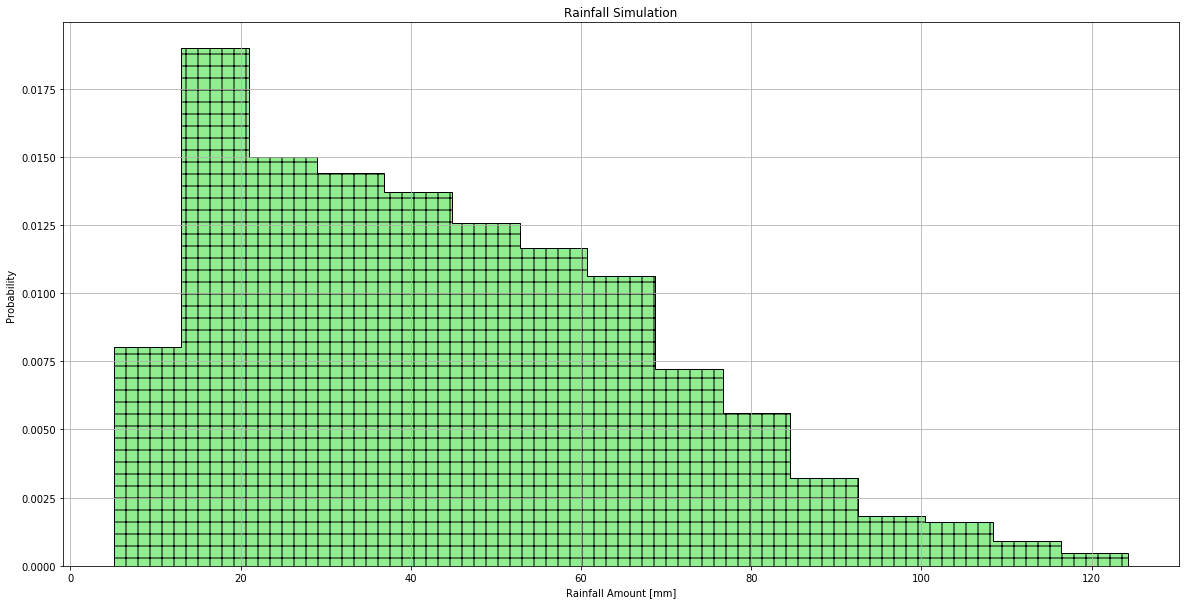

DescribeResult(nobs=1100, minmax=(5.090224427236398, 124.31570373380195), mean=43.89329411276598, variance=597.5020875028691, skewness=0.6171738428202453, kurtosis=-0.2207401012792256)

 
 Current Month is: 09


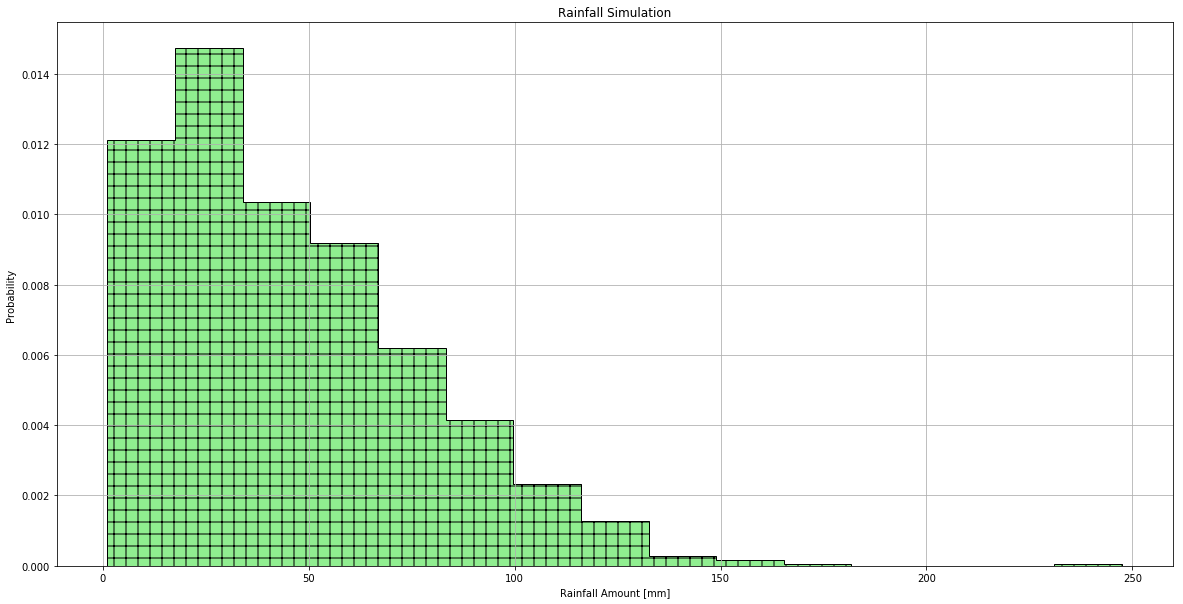

DescribeResult(nobs=1100, minmax=(1.1341236672481467, 247.4802725315549), mean=46.196393050942156, variance=984.0836156960655, skewness=1.0157544469003494, kurtosis=1.4278527077662897)

 
 Current Month is: 10


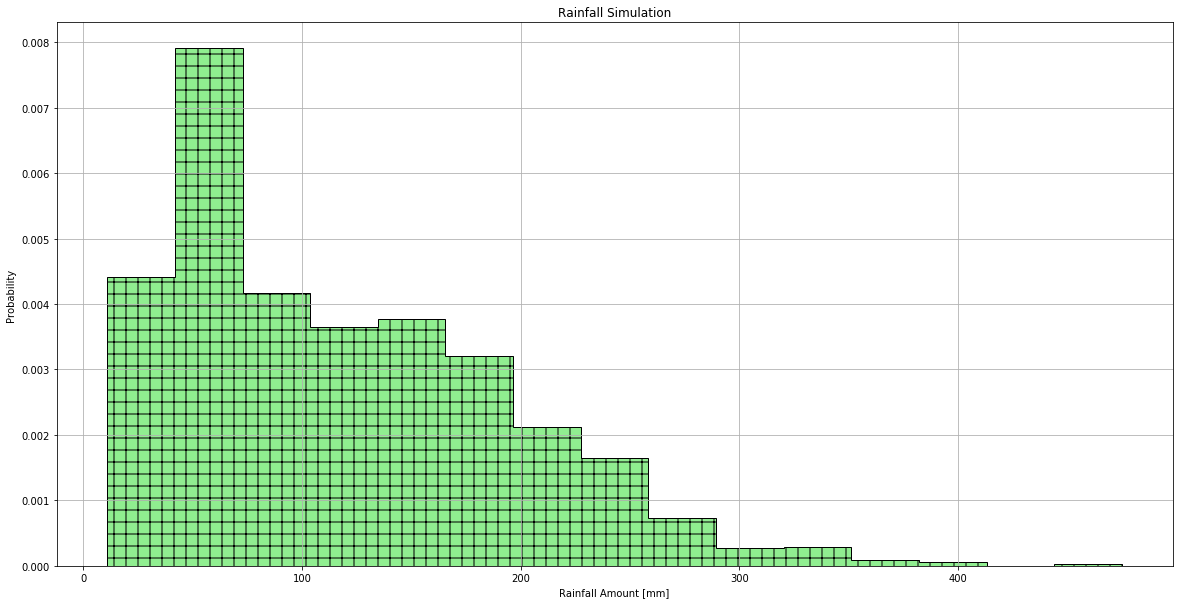

DescribeResult(nobs=1100, minmax=(11.015142698631953, 474.8117926624041), mean=118.09333671995687, variance=5622.331248793451, skewness=0.8643834173565335, kurtosis=0.37828163128333836)

 
 Current Month is: 11


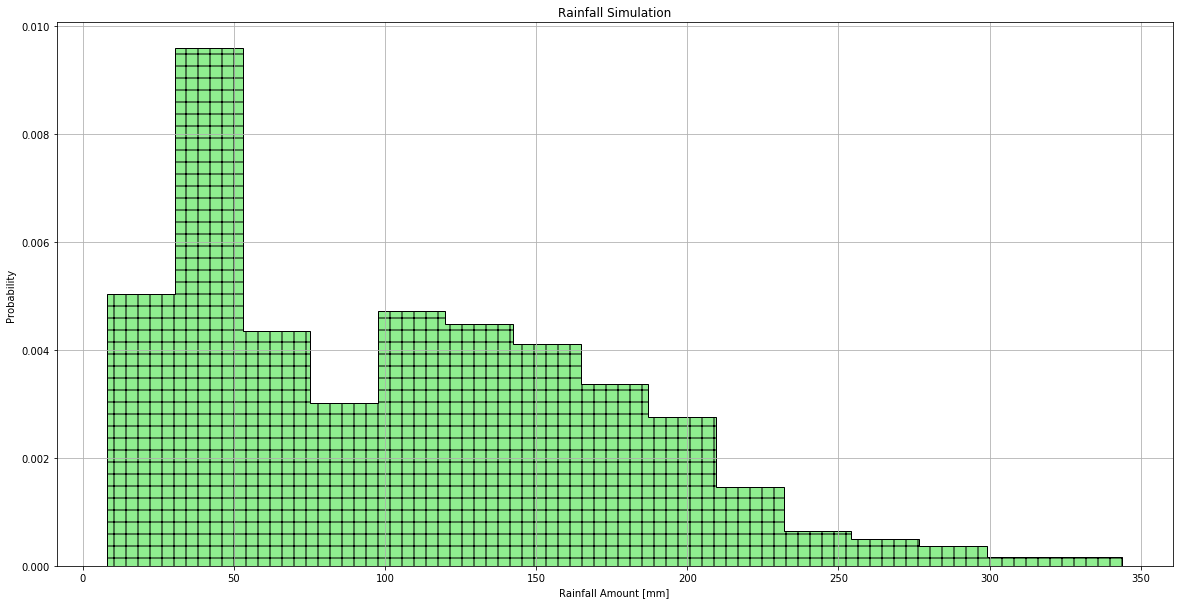

DescribeResult(nobs=1100, minmax=(8.19278614565207, 343.7107937985551), mean=105.96411076359284, variance=4596.2053155737085, skewness=0.6416475549878338, kurtosis=-0.2887127806292762)


In [170]:
for month in range(1,12):
    print('\n \n Current Month is:',format(month,'02'))
    monthRainfall=[]
    
    startYear = 2005
    endYear = 2016
    
    for year in range(startYear,endYear):
        #print(year)
        monthRainfallYear = optionRainfallCalculator(iterations=100,
                              startDate=str(year)+'-'+str(format(month,'02'))+'-01',
                              transitionsParametersDry= transitionsParametersDry ,
                              transitionsParametersWet = transitionsParametersWet,
                              amountParametersGamma = amountParametersGamma,
                              optionMonthTerm = 1)
        monthRainfall.extend(monthRainfallYear)
    
    ## Plot histogram.

    plotRainfallDistribution(monthRainfall)
    
    
    ## Print Statistics.

    print(stats.describe(monthRainfall))

    